In [44]:
import os
import sys
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

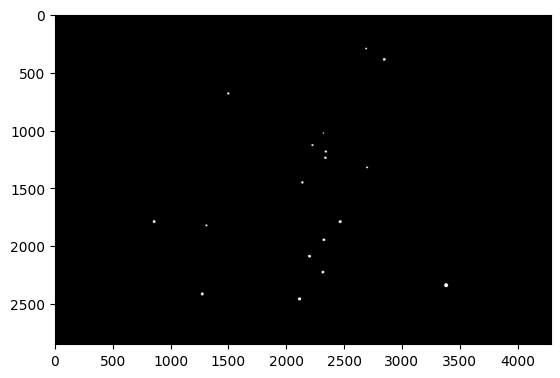

In [5]:
mask = cv2.imread('../data/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/1. Microaneurysms/IDRiD_01_MA.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(mask, cmap='gray')

In [7]:
np.unique(mask)

array([ 0, 76], dtype=uint8)

# EyePACS crop black area

In [17]:
def saturate_contrast(p, num):
    pic = p.copy()
    pic = pic.astype("int64")
    pic = np.clip(pic + (pic - 10) * num, 0, 255)
    pic = pic.astype("uint8")
    return pic

def image_crop(image_path):
    try:
        img = cv2.imread(image_path)
    except:
        print(image_path)
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = saturate_contrast(img2, 10)
    img2 = cv2.medianBlur(img2, 5)
    x, y, w, h = cv2.boundingRect(img2)
    img = img[y : y + h, x : x + w]
    return img

In [18]:
img_list = sorted(os.listdir('../data/EyePACS/'))
for img in tqdm(img_list):
    if img == '.DS_Store':
        continue
    image = image_crop('../data/EyePACS/' + img)
    cv2.imwrite('../data/EyePACS/' + img, image)

  0%|          | 0/8408 [00:00<?, ?it/s]

100%|██████████| 8408/8408 [13:02<00:00, 10.75it/s]


# IDRiD

## to 1 ~ 4

In [19]:
micro_list = sorted(os.listdir('../data/IDRiD/train/1.Microaneurysms/'))
hemo_list = sorted(os.listdir('../data/IDRiD/train/2.Hemorrhages/'))
hard_list = sorted(os.listdir('../data/IDRiD/train/3.HardExudates/'))
soft_list = sorted(os.listdir('../data/IDRiD/train/4.SoftExudates/'))

for micro in micro_list:
    if micro == '.DS_Store':
        continue
    image = cv2.imread('../data/IDRiD/train/1.Microaneurysms/' + micro, cv2.IMREAD_GRAYSCALE)
    image = np.where(image > 0, 1, 0)
    cv2.imwrite('../data/IDRiD/train/1.Microaneurysms/' + micro, image)

for hemo in hemo_list:
    if hemo == '.DS_Store':
        continue
    image = cv2.imread('../data/IDRiD/train/2.Hemorrhages/' + hemo, cv2.IMREAD_GRAYSCALE)
    image = np.where(image > 0, 2, 0)
    cv2.imwrite('../data/IDRiD/train/2.Hemorrhages/' + hemo, image)

for hard in hard_list:
    if hard == '.DS_Store':
        continue
    image = cv2.imread('../data/IDRiD/train/3.HardExudates/' + hard, cv2.IMREAD_GRAYSCALE)
    image = np.where(image > 0, 3, 0)
    cv2.imwrite('../data/IDRiD/train/3.HardExudates/' + hard, image)

for soft in soft_list:
    if soft == '.DS_Store':
        continue
    image = cv2.imread('../data/IDRiD/train/4.SoftExudates/' + soft, cv2.IMREAD_GRAYSCALE)
    image = np.where(image > 0, 4, 0)
    cv2.imwrite('../data/IDRiD/train/4.SoftExudates/' + soft, image)

In [27]:
micro = cv2.imread('../data/IDRiD/train/1.Microaneurysms/IDRiD_54_MA.tif', cv2.IMREAD_UNCHANGED)
print(np.unique(micro))
hemo = cv2.imread('../data/IDRiD/train/2.Hemorrhages/IDRiD_54_HE.tif', cv2.IMREAD_UNCHANGED)
print(np.unique(hemo))
hard = cv2.imread('../data/IDRiD/train/3.HardExudates/IDRiD_54_EX.tif', cv2.IMREAD_UNCHANGED)
print(np.unique(hard))
soft = cv2.imread('../data/IDRiD/train/4.SoftExudates/IDRiD_54_SE.tif', cv2.IMREAD_UNCHANGED)
print(np.unique(soft))

[0 1]
[0 2]
[0 3]
[0 4]


In [28]:
micro_list = sorted(os.listdir('../data/IDRiD/test/1.Microaneurysms/'))
hemo_list = sorted(os.listdir('../data/IDRiD/test/2.Hemorrhages/'))
hard_list = sorted(os.listdir('../data/IDRiD/test/3.HardExudates/'))
soft_list = sorted(os.listdir('../data/IDRiD/test/4.SoftExudates/'))

for micro in micro_list:
    if micro == '.DS_Store':
        continue
    image = cv2.imread('../data/IDRiD/test/1.Microaneurysms/' + micro, cv2.IMREAD_GRAYSCALE)
    image = np.where(image > 0, 1, 0)
    cv2.imwrite('../data/IDRiD/test/1.Microaneurysms/' + micro, image)

for hemo in hemo_list:
    if hemo == '.DS_Store':
        continue
    image = cv2.imread('../data/IDRiD/test/2.Hemorrhages/' + hemo, cv2.IMREAD_GRAYSCALE)
    image = np.where(image > 0, 2, 0)
    cv2.imwrite('../data/IDRiD/test/2.Hemorrhages/' + hemo, image)

for hard in hard_list:
    if hard == '.DS_Store':
        continue
    image = cv2.imread('../data/IDRiD/test/3.HardExudates/' + hard, cv2.IMREAD_GRAYSCALE)
    image = np.where(image > 0, 3, 0)
    cv2.imwrite('../data/IDRiD/test/3.HardExudates/' + hard, image)

for soft in soft_list:
    if soft == '.DS_Store':
        continue
    image = cv2.imread('../data/IDRiD/test/4.SoftExudates/' + soft, cv2.IMREAD_GRAYSCALE)
    image = np.where(image > 0, 4, 0)
    cv2.imwrite('../data/IDRiD/test/4.SoftExudates/' + soft, image)

In [30]:
micro = cv2.imread('../data/IDRiD/test/1.Microaneurysms/IDRiD_55_MA.tif', cv2.IMREAD_UNCHANGED)
print(np.unique(micro))
hemo = cv2.imread('../data/IDRiD/test/2.Hemorrhages/IDRiD_55_HE.tif', cv2.IMREAD_UNCHANGED)
print(np.unique(hemo))
hard = cv2.imread('../data/IDRiD/test/3.HardExudates/IDRiD_55_EX.tif', cv2.IMREAD_UNCHANGED)
print(np.unique(hard))
soft = cv2.imread('../data/IDRiD/test/4.SoftExudates/IDRiD_55_SE.tif', cv2.IMREAD_UNCHANGED)
print(np.unique(soft))

[0 1]
[0 2]
[0 3]
[0 4]


## to OneMasks

In [42]:
img_list = sorted(os.listdir('../data/IDRiD/train/Original_Images/'))

for img in img_list:
    if img == '.DS_Store':
        continue
    name = img.split('.')[0]
    img_shape = cv2.imread('../data/IDRiD/train/Original_Images/' + img, cv2.IMREAD_GRAYSCALE).shape
    mask = np.zeros(img_shape, dtype=np.uint8)
    micro = cv2.imread(f'../data/IDRiD/train/1.Microaneurysms/{name}_MA.tif', cv2.IMREAD_UNCHANGED)
    hemo = cv2.imread(f'../data/IDRiD/train/2.Hemorrhages/{name}_HE.tif', cv2.IMREAD_UNCHANGED)
    hard = cv2.imread(f'../data/IDRiD/train/3.HardExudates/{name}_EX.tif', cv2.IMREAD_UNCHANGED)
    soft = cv2.imread(f'../data/IDRiD/train/4.SoftExudates/{name}_SE.tif', cv2.IMREAD_UNCHANGED)

    if micro is not None:
        micro = micro.astype(np.uint8)
        mask = cv2.add(mask, micro)
    if hemo is not None:
        hemo = hemo.astype(np.uint8)
        mask = cv2.add(mask, hemo)
    if hard is not None:
        hard = hard.astype(np.uint8)
        mask = cv2.add(mask, hard)
    if soft is not None:
        soft = soft.astype(np.uint8)
        mask = cv2.add(mask, soft)

    cv2.imwrite(f'../data/IDRiD/train/0.OneMasks/{name}_mask.png', mask)

[ WARN:0@7584.117] global loadsave.cpp:248 findDecoder imread_('../data/IDRiD/train/4.SoftExudates/IDRiD_01_SE.tif'): can't open/read file: check file path/integrity
[ WARN:0@7584.437] global loadsave.cpp:248 findDecoder imread_('../data/IDRiD/train/4.SoftExudates/IDRiD_02_SE.tif'): can't open/read file: check file path/integrity
[ WARN:0@7585.172] global loadsave.cpp:248 findDecoder imread_('../data/IDRiD/train/4.SoftExudates/IDRiD_04_SE.tif'): can't open/read file: check file path/integrity
[ WARN:0@7585.504] global loadsave.cpp:248 findDecoder imread_('../data/IDRiD/train/4.SoftExudates/IDRiD_05_SE.tif'): can't open/read file: check file path/integrity
[ WARN:0@7585.827] global loadsave.cpp:248 findDecoder imread_('../data/IDRiD/train/4.SoftExudates/IDRiD_06_SE.tif'): can't open/read file: check file path/integrity
[ WARN:0@7586.142] global loadsave.cpp:248 findDecoder imread_('../data/IDRiD/train/4.SoftExudates/IDRiD_07_SE.tif'): can't open/read file: check file path/integrity
[ WA

In [43]:
img_list = sorted(os.listdir('../data/IDRiD/test/Original_Images/'))

for img in img_list:
    if img == '.DS_Store':
        continue
    name = img.split('.')[0]
    img_shape = cv2.imread('../data/IDRiD/test/Original_Images/' + img, cv2.IMREAD_GRAYSCALE).shape
    mask = np.zeros(img_shape, dtype=np.uint8)
    micro = cv2.imread(f'../data/IDRiD/test/1.Microaneurysms/{name}_MA.tif', cv2.IMREAD_UNCHANGED)
    hemo = cv2.imread(f'../data/IDRiD/test/2.Hemorrhages/{name}_HE.tif', cv2.IMREAD_UNCHANGED)
    hard = cv2.imread(f'../data/IDRiD/test/3.HardExudates/{name}_EX.tif', cv2.IMREAD_UNCHANGED)
    soft = cv2.imread(f'../data/IDRiD/test/4.SoftExudates/{name}_SE.tif', cv2.IMREAD_UNCHANGED)

    if micro is not None:
        micro = micro.astype(np.uint8)
        mask = cv2.add(mask, micro)
    if hemo is not None:
        hemo = hemo.astype(np.uint8)
        mask = cv2.add(mask, hemo)
    if hard is not None:
        hard = hard.astype(np.uint8)
        mask = cv2.add(mask, hard)
    if soft is not None:
        soft = soft.astype(np.uint8)
        mask = cv2.add(mask, soft)

    cv2.imwrite(f'../data/IDRiD/test/0.OneMasks/{name}_mask.png', mask)

[ WARN:0@7645.046] global loadsave.cpp:248 findDecoder imread_('../data/IDRiD/test/4.SoftExudates/IDRiD_57_SE.tif'): can't open/read file: check file path/integrity
[ WARN:0@7645.368] global loadsave.cpp:248 findDecoder imread_('../data/IDRiD/test/4.SoftExudates/IDRiD_58_SE.tif'): can't open/read file: check file path/integrity
[ WARN:0@7646.930] global loadsave.cpp:248 findDecoder imread_('../data/IDRiD/test/4.SoftExudates/IDRiD_62_SE.tif'): can't open/read file: check file path/integrity
[ WARN:0@7647.254] global loadsave.cpp:248 findDecoder imread_('../data/IDRiD/test/4.SoftExudates/IDRiD_63_SE.tif'): can't open/read file: check file path/integrity
[ WARN:0@7647.994] global loadsave.cpp:248 findDecoder imread_('../data/IDRiD/test/4.SoftExudates/IDRiD_65_SE.tif'): can't open/read file: check file path/integrity
[ WARN:0@7648.306] global loadsave.cpp:248 findDecoder imread_('../data/IDRiD/test/4.SoftExudates/IDRiD_66_SE.tif'): can't open/read file: check file path/integrity
[ WARN:0@7

# FGADR

## to 1 ~ 4

In [45]:
micro_list = sorted(os.listdir('../data/FGADR/1.Microaneurysms/'))
hemo_list = sorted(os.listdir('../data/FGADR/2.Hemohedges/'))
hard_list = sorted(os.listdir('../data/FGADR/3.HardExudates/'))
soft_list = sorted(os.listdir('../data/FGADR/4.SoftExudates/'))

for micro in micro_list:
    if micro == '.DS_Store':
        continue
    image = cv2.imread('../data/FGADR/1.Microaneurysms/' + micro, cv2.IMREAD_GRAYSCALE)
    image = np.where(image > 0, 1, 0)
    cv2.imwrite('../data/FGADR/1.Microaneurysms_1/' + micro, image)

for hemo in hemo_list:
    if hemo == '.DS_Store':
        continue
    image = cv2.imread('../data/FGADR/2.Hemohedges/' + hemo, cv2.IMREAD_GRAYSCALE)
    image = np.where(image > 0, 2, 0)
    cv2.imwrite('../data/FGADR/2.Hemohedges_2/' + hemo, image)

for hard in hard_list:
    if hard == '.DS_Store':
        continue
    image = cv2.imread('../data/FGADR/3.HardExudates/' + hard, cv2.IMREAD_GRAYSCALE)
    image = np.where(image > 0, 3, 0)
    cv2.imwrite('../data/FGADR/3.HardExudates_3/' + hard, image)

for soft in soft_list:
    if soft == '.DS_Store':
        continue
    image = cv2.imread('../data/FGADR/4.SoftExudates/' + soft, cv2.IMREAD_GRAYSCALE)
    image = np.where(image > 0, 4, 0)
    cv2.imwrite('../data/FGADR/4.SoftExudates_4/' + soft, image)

In [50]:
micro = cv2.imread('../data/FGADR/1.Microaneurysms_1/0000_1.png', cv2.IMREAD_GRAYSCALE)
print(np.unique(micro))
hemo = cv2.imread('../data/FGADR/2.Hemohedges_2/0000_1.png', cv2.IMREAD_GRAYSCALE)
print(np.unique(hemo))
hard = cv2.imread('../data/FGADR/3.HardExudates_3/0000_1.png', cv2.IMREAD_GRAYSCALE)
print(np.unique(hard))
soft = cv2.imread('../data/FGADR/4.SoftExudates_4/0009_1.png', cv2.IMREAD_GRAYSCALE)
print(np.unique(soft))

[0 1]
[0 2]
[0 3]
[0 4]


## to OneMasks

In [51]:
img_list = sorted(os.listdir('../data/FGADR/Original_Images/'))

for img in img_list:
    if img == '.DS_Store':
        continue
    img_shape = cv2.imread('../data/FGADR/Original_Images/' + img, cv2.IMREAD_GRAYSCALE).shape
    mask = np.zeros(img_shape, dtype=np.uint8)
    micro = cv2.imread(f'../data/FGADR/1.Microaneurysms_1/{img}', cv2.IMREAD_GRAYSCALE)
    hemo = cv2.imread(f'../data/FGADR/2.Hemohedges_2/{img}', cv2.IMREAD_GRAYSCALE)
    hard = cv2.imread(f'../data/FGADR/3.HardExudates_3/{img}', cv2.IMREAD_GRAYSCALE)
    soft = cv2.imread(f'../data/FGADR/4.SoftExudates_4/{img}', cv2.IMREAD_GRAYSCALE)

    if micro is not None:
        micro = micro.astype(np.uint8)
        mask = cv2.add(mask, micro)
    if hemo is not None:
        hemo = hemo.astype(np.uint8)
        mask = cv2.add(mask, hemo)
    if hard is not None:
        hard = hard.astype(np.uint8)
        mask = cv2.add(mask, hard)
    if soft is not None:
        soft = soft.astype(np.uint8)
        mask = cv2.add(mask, soft)

    cv2.imwrite(f'../data/FGADR/0.OneMasks_gray/{img}', mask)

In [53]:
import random

# random하게 10개의 이미지를 선택
img_list = random.sample(os.listdir('../data/FGADR/0.OneMasks_gray/'), 10)

for name in img_list:
    if name == '.DS_Store':
        continue
    img = cv2.imread(f'../data/FGADR/0.OneMasks_gray/{name}', cv2.IMREAD_GRAYSCALE)
    print(np.unique(img))

[0 1 2 3 4 5]
[0 1]
[0 1 2 3]
[0 1]
[0 1 2 4]
[0 1 2 4]
[0 1 2 4]
[0 1 2 3 4]
[0 1 2 3]
[0 1 2 3 4]


In [79]:
# train, val, test로 나누기
from sklearn.model_selection import train_test_split

img_list = os.listdir('../data/FGADR/Original_Images/')
train, test = train_test_split(img_list, test_size=0.25, random_state=42)
train, val = train_test_split(train, test_size=0.065, random_state=42)
print(len(train), len(val), len(test))

1291 90 461


In [82]:
for name in train:
    if name == '.DS_Store':
        continue
    shutil.move(f'../data/FGADR/Original_Images/{name}', f'../data/FGADR/train/Original_Images/{name}')
    shutil.move(f'../data/FGADR/0.OneMasks_gray/{name}', f'../data/FGADR/train/0.OneMasks_gray/{name}')
    shutil.move(f'../data/FGADR/1.Microaneurysms_1/{name}', f'../data/FGADR/train/1.Microaneurysms/{name}')
    shutil.move(f'../data/FGADR/2.Hemohedges_2/{name}', f'../data/FGADR/train/2.Hemorrhages/{name}')
    shutil.move(f'../data/FGADR/3.HardExudates_3/{name}', f'../data/FGADR/train/3.HardExudates/{name}')
    shutil.move(f'../data/FGADR/4.SoftExudates_4/{name}', f'../data/FGADR/train/4.SoftExudates/{name}')

for name in val:
    if name == '.DS_Store':
        continue
    shutil.move(f'../data/FGADR/Original_Images/{name}', f'../data/FGADR/val/Original_Images/{name}')
    shutil.move(f'../data/FGADR/0.OneMasks_gray/{name}', f'../data/FGADR/val/0.OneMasks_gray/{name}')
    shutil.move(f'../data/FGADR/1.Microaneurysms_1/{name}', f'../data/FGADR/val/1.Microaneurysms/{name}')
    shutil.move(f'../data/FGADR/2.Hemohedges_2/{name}', f'../data/FGADR/val/2.Hemorrhages/{name}')
    shutil.move(f'../data/FGADR/3.HardExudates_3/{name}', f'../data/FGADR/val/3.HardExudates/{name}')
    shutil.move(f'../data/FGADR/4.SoftExudates_4/{name}', f'../data/FGADR/val/4.SoftExudates/{name}')

for name in test:
    if name == '.DS_Store':
        continue
    shutil.move(f'../data/FGADR/Original_Images/{name}', f'../data/FGADR/test/Original_Images/{name}')
    shutil.move(f'../data/FGADR/0.OneMasks_gray/{name}', f'../data/FGADR/test/0.OneMasks_gray/{name}')
    shutil.move(f'../data/FGADR/1.Microaneurysms_1/{name}', f'../data/FGADR/test/1.Microaneurysms/{name}')
    shutil.move(f'../data/FGADR/2.Hemohedges_2/{name}', f'../data/FGADR/test/2.Hemorrhages/{name}')
    shutil.move(f'../data/FGADR/3.HardExudates_3/{name}', f'../data/FGADR/test/3.HardExudates/{name}')
    shutil.move(f'../data/FGADR/4.SoftExudates_4/{name}', f'../data/FGADR/test/4.SoftExudates/{name}')

In [83]:
print(len(os.listdir('../data/FGADR/train/Original_Images/')))
print(len(os.listdir('../data/FGADR/val/Original_Images/')))
print(len(os.listdir('../data/FGADR/test/Original_Images/')))

print(len(os.listdir('../data/FGADR/train/0.OneMasks_gray/')))
print(len(os.listdir('../data/FGADR/val/0.OneMasks_gray/')))
print(len(os.listdir('../data/FGADR/test/0.OneMasks_gray/')))

1292
90
461
1292
90
461
